In [4]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline

## Install this on a new system
# nltk.download('punkt')
from nltk.tokenize import word_tokenize


warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')




## Get the overall info from the dataset


In [5]:
## Read the dataset from CSV file

city_df = pd.read_csv("textdata/NewYork-dataset.csv")



In [6]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20577 entries, 0 to 20576
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 20573 non-null  object 
 1   created_at                  20577 non-null  object 
 2   hashtags                    11780 non-null  object 
 3   media                       3885 non-null   object 
 4   urls                        19689 non-null  object 
 5   favorite_count              20577 non-null  int64  
 6   id                          20577 non-null  int64  
 7   in_reply_to_screen_name     138 non-null    object 
 8   in_reply_to_status_id       13 non-null     float64
 9   in_reply_to_user_id         138 non-null    float64
 10  lang                        20577 non-null  object 
 11  place                       20573 non-null  object 
 12  possibly_sensitive          19994 non-null  object 
 13  retweet_count               205

In [7]:
city_df.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,"-73.94989,40.67786",Fri Mar 20 03:49:29 +0000 2020,NaN,NaN,https://www.instagram.com/p/B98NDGWg-kh/?igshi...,1,1240847905700921344,NaN,NaN,NaN,...,429,426,13,"Atlanta, GA",Big Gina 👑,BIGGINAENT,8506,NaN,NaN,False
1,"-74.02876191,40.63170235",Fri Mar 20 20:05:05 +0000 2020,NYCShutdown brooklyn nyc newyork corona covid_...,NaN,https://www.instagram.com/p/B999znhAUkq/?igshi...,0,1241093426638184449,NaN,NaN,NaN,...,282,617,6,"Brooklyn, NY",Jovahn Huertas,Jovahn_Huertas,1870,NaN,NaN,False
2,"-73.4949,41.1468",Fri Mar 20 19:56:20 +0000 2020,helpeachother usa corona,NaN,https://www.instagram.com/p/B998zsGFRX-/?igshi...,0,1241091223793917952,NaN,NaN,NaN,...,247,261,10,"New Canaan, Ct",Denise Gannalo,denisegannalo,2790,NaN,http://www.denisegannalo.com,False
3,"-73.8309,40.7",Sat Mar 21 05:01:38 +0000 2020,covid duxduce corona beer virus,NaN,https://www.instagram.com/p/B9-7NZLp4Cl/?igshi...,0,1241228451924840448,NaN,NaN,NaN,...,215,213,4,BKLYN/QUEENZ,DIYREKT,Diyrekt,4297,NaN,http://www.duxduce.com,False
4,"-73.8669,40.85",Thu Mar 19 20:28:50 +0000 2020,NaN,NaN,https://www.instagram.com/p/B97buuUlQXEAFwFQ2X...,0,1240737015181635585,NaN,NaN,NaN,...,863,1693,55,"New York, NY",C.P.T.,PtCore,26674,NaN,NaN,False


In [8]:
# ASSIGN Set dataset info 

# toronto_df.info()
# toronto_df.head(5)


## Create a dataframe with a column for tweets
#df_text = toronto_df['text']
# df_text = toronto_df[['text']].convert_dtypes(object,str)

df_text = city_df[['text']].convert_dtypes(object,str)
df_text['created_at'] = city_df[['created_at']].convert_dtypes(object,str)
df_text['place'] = city_df[['place']].convert_dtypes(object,str)
df_text['hashtags'] = city_df[['hashtags']].convert_dtypes(object,str)

# df_timebased_tweets = 
## Perhaps we need the hashtags too
# created_at	, hashtags,  place

#df_text = toronto_df[['hashtags','text']]

#df_text.info()
# df_text.head(10)            

In [9]:
df_text.head(10)    

,text,created_at,place,hashtags
0,💥💥💥SUPPORT SMALL BUSINESS DURING THE CORONA VI...,Fri Mar 20 03:49:29 +0000 2020,"Brooklyn, NY",<NA>
1,Reporting from Bay Ridge: scenes from a city i...,Fri Mar 20 20:05:05 +0000 2020,"Brooklyn, NY",NYCShutdown brooklyn nyc newyork corona covid_...
2,We are a positive thinking nation. What can ea...,Fri Mar 20 19:56:20 +0000 2020,"New Canaan, CT",helpeachother usa corona
3,#covid-19 #duxduce #corona #beer vs #virus @ ...,Sat Mar 21 05:01:38 +0000 2020,"Queens, NY",covid duxduce corona beer virus
4,I HATE this Koon @Byrdgangshoota 🤦🏾‍♂️😂 Nigga ...,Thu Mar 19 20:28:50 +0000 2020,"Bronx, NY",<NA>
5,Corona NY Fri Mar 20th PM Forecast: TONIGHT Pa...,Fri Mar 20 21:06:59 +0000 2020,"Queens, NY",<NA>
6,Broke the quarantine for some b-ball with the ...,Fri Mar 20 18:54:44 +0000 2020,"Brooklyn, NY",mobadanga corona
7,Mr Softee out here tripping tripping! Did he n...,Fri Mar 20 20:15:20 +0000 2020,"Queens, NY",<NA>
8,My evening run. Feels a little more apocalypti...,Fri Mar 20 00:39:20 +0000 2020,"Manhattan, NY",corona corona
9,Remember guys! Always wear protection. . . . ...,Thu Mar 19 20:58:01 +0000 2020,"Manhattan, NY",trojan condom nyc corona coronatime lol funnyo...


## Cleaning the text Data

In [10]:
#1-Clean Emojis from text
def cleanEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#2-CleanTweets function replaces non-text entities with space
def cleanTweets(text):
    text = re.sub(r'@[A-Za-z0-9]','',text, flags=re.MULTILINE)  # Remove @mentions
    text = re.sub(r'#','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'@','',text, flags=re.MULTILINE)              # Removing the # symbol
    text = re.sub(r'RT[\s]+','',text, flags=re.MULTILINE)        # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text, flags=re.MULTILINE) # Remove the hyper link
    text = re.sub(r'http?:\/\/\S+','',text, flags=re.MULTILINE)  # Remove the hyper link

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    # Note: remove special charactres and punctuations -
    text = re.sub(r'[^a-zA-Z# ]','',text, flags=re.MULTILINE)
    
    
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    #text = re.sub('https', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotography', '', text, flags=re.MULTILINE)
    text = re.sub('igstreet', '', text, flags=re.MULTILINE)   
    text = re.sub('cityscape', '', text, flags=re.MULTILINE)
    text = re.sub('streetphotographer', '', text, flags=re.MULTILINE)
    text = re.sub('urbanstreetphotogallery', '', text, flags=re.MULTILINE)
    text = re.sub('photodocumentary', '', text, flags=re.MULTILINE)
    text = re.sub('ig_street', '', text, flags=re.MULTILINE)
    text = re.sub('Covid', '', text, flags=re.MULTILINE)
    text = re.sub('COVID', '', text, flags=re.MULTILINE)
    text = re.sub('covid', '', text, flags=re.MULTILINE)
    text = re.sub('spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('Spicollective', '', text, flags=re.MULTILINE)
    text = re.sub('lensculture', '', text, flags=re.MULTILINE)
    text = re.sub('Toronto', '', text, flags=re.MULTILINE)
    text = re.sub('Ontario', '', text, flags=re.MULTILINE)
    text = re.sub('will', '', text, flags=re.MULTILINE)
    text = re.sub('bnw', '', text, flags=re.MULTILINE)
    text = re.sub('bw', '', text, flags=re.MULTILINE)


    text = re.sub(r'\xc2\xb7','',text)  # Remove bullet points
    text = re.sub(r'\u2022','',text)  # Remove bullet points       
    # text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)          # Remove links that start with HTTP/HTTPS in the tweet
    # text = re.sub(r'[-a-zA-Z0–9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0–9@:%_\+.~#?&//=]*)',
    #  '', text, flags=re.MULTILINE)           # Remove other url links


    return text


In [11]:
# pass the text through cleantweet and removeEmoji functions
# s = df_text.iloc[[2]]
df_text['text'] = df_text['text'].apply(cleanTweets)
df_text['text'] = df_text['text'].apply(cleanEmoji)




In [12]:
df_text.head(2)

,text,created_at,place,hashtags
0,SUPPOSMALL BUSINESS DURING THE CORONA VIRUS OU...,Fri Mar 20 03:49:29 +0000 2020,"Brooklyn, NY",<NA>
1,Reporting from Bay Ridge scenes from a city in...,Fri Mar 20 20:05:05 +0000 2020,"Brooklyn, NY",NYCShutdown brooklyn nyc newyork corona covid_...


# A- Sentence Level Analysis

## Start working on the contect and subject area

In [13]:
#create a function to get the subjectivity
def getSubjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns to add the sentiment and polarity
df_text['subjectivity'] = df_text['text'].apply(getSubjectivity)
df_text['polarity'] = df_text['text'].apply(getPolarity)

#Display the new dataset
df_text.head(10)


,text,created_at,place,hashtags,subjectivity,polarity
0,SUPPOSMALL BUSINESS DURING THE CORONA VIRUS OU...,Fri Mar 20 03:49:29 +0000 2020,"Brooklyn, NY",<NA>,0.600000,0.400000
1,Reporting from Bay Ridge scenes from a city in...,Fri Mar 20 20:05:05 +0000 2020,"Brooklyn, NY",NYCShutdown brooklyn nyc newyork corona covid_...,0.000000,0.000000
2,We are a positive thinking nation What can eac...,Fri Mar 20 19:56:20 +0000 2020,"New Canaan, CT",helpeachother usa corona,0.698485,0.342424
3,duxduce corona beer vs virus Queens New York,Sat Mar 21 05:01:38 +0000 2020,"Queens, NY",covid duxduce corona beer virus,0.454545,0.136364
4,I HATE this Koon yrdgangshoota Nigga Arguing ...,Thu Mar 19 20:28:50 +0000 2020,"Bronx, NY",<NA>,0.594444,-0.477778
5,Corona NY Fri Mar th PM Forecast TONIGHT Partl...,Fri Mar 20 21:06:59 +0000 2020,"Queens, NY",<NA>,0.000000,0.000000
6,Broke the quarantine for some bball with the t...,Fri Mar 20 18:54:44 +0000 2020,"Brooklyn, NY",mobadanga corona,0.000000,0.000000
7,Mr Softee out here tripping tripping Did he no...,Fri Mar 20 20:15:20 +0000 2020,"Queens, NY",<NA>,0.266667,0.225000
8,My evening run Feels a little more apocalyptic...,Fri Mar 20 00:39:20 +0000 2020,"Manhattan, NY",corona corona,0.477273,0.146307
9,Remember guys Always wear protection trojan co...,Thu Mar 19 20:58:01 +0000 2020,"Manhattan, NY",trojan condom nyc corona coronatime lol funnyo...,0.536364,0.357576


In [14]:
# df_text.head(10)
df_text.to_csv("textdata/myexportfile_newyork.csv")

## Make a WordCloud chart -word frequency map

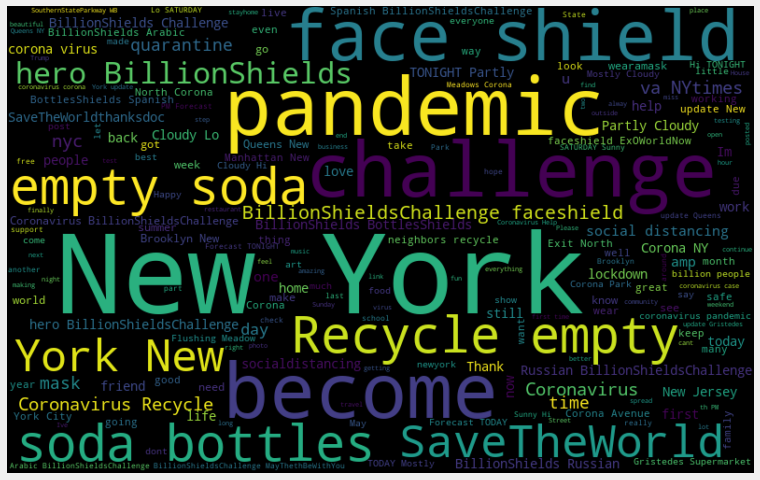

In [16]:
# plot outcome using word cloud
# visualize the most frequency used words
allWords = ' '.join(twts for twts in df_text['text'])

wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)
plt.figure(figsize=(19,8))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()


## Positive and Negative Sentiments

In [17]:
#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['analysis'] = df_text['polarity'].apply(getSentAnalysis)

#df_text


## All Negative Tweets

In [18]:
#print all of the negative tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Negative'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#         # print()  #to print uncomment
#         j = j+1

## All Positive Tweets

In [19]:
#print all of the Positive tweets
j=1
sortedDF_text = df_text.sort_values(by=['polarity'])
# for i in range(0, sortedDF_text.shape[0]):
#     if (sortedDF_text['analysis'][i] == 'Positive'):
#         print(str(j)+ ')' + sortedDF_text['text'][i])
#       #  print()
#         j = j+1

## Scatter pLot - map the postitive-negative distribution

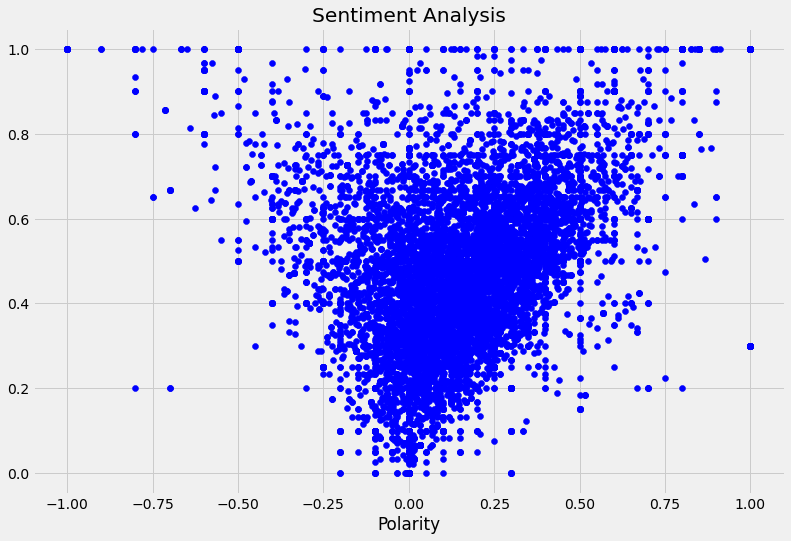

In [34]:
# plot the polarity and subjectivity
plt.figure(figsize=(12,8))
for i in range(0,df_text.shape[0]):
    plt.scatter(df_text['polarity'][i],df_text['subjectivity'][i], color='Blue')

plt.title('NewYork - Sentiment Analysis')
plt.xlabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

## Overall picture: Positive, Negative, Neutral


In [20]:
#Get the percentages: Positive, Negative, Neutral

## Percentage of Positive Tweets
ptweets = df_text[df_text.analysis == 'Positive']
ptweets = ptweets ['text']
positivetweets = round ((ptweets.shape[0] /df_text.shape[0]) *100,1)
print (f"--> percentage of positive tweets: {positivetweets} %")


--> percentage of positive tweets: 52.9 %


In [21]:
# Get the percentage of negative tweets
ntweets = df_text[df_text.analysis == 'Negative']
ntweets = ntweets['text']

## Percentage of Negative Tweets

negativetweets = round( (ntweets.shape[0] / df_text.shape[0]*100),1)
print (f"--> percentage of negative tweets: {negativetweets} %")


--> percentage of negative tweets: 21.1 %


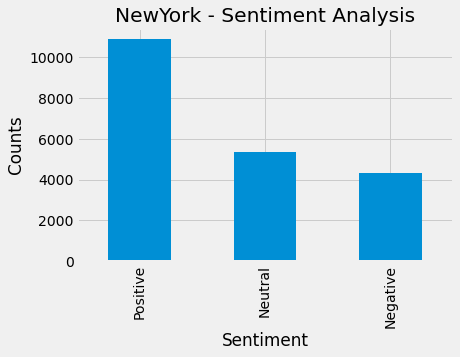

In [22]:
#Show the value counts
df_text['analysis'].value_counts()

#plot and visualize the counts
plt.title('NewYork - Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_text['analysis'].value_counts().plot(kind='bar')

plt.show('Sentiment')



# B- Word Level Analysis

## B.1 Define Tokenized Tweets

In [23]:
# import the stopword library

from nltk.corpus import stopwords
# nltk.download('stopwords')  #need to run on a new machine

import ast  #used for literal_eval



In [24]:
import nltk
##  Add a new column "tokenized_tw" to the dataset and include the tokenized tweets
##  split content into words

df_text['tokenized_tw'] = df_text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# df_text['tokenized_tw'] = df_text['tokenized_tw'].tolist()

In [25]:
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,SUPPOSMALL BUSINESS DURING THE CORONA VIRUS OU...,Fri Mar 20 03:49:29 +0000 2020,"Brooklyn, NY",<NA>,0.6,0.4,Positive,"[SUPPOSMALL, BUSINESS, DURING, THE, CORONA, VI..."


In [26]:
# convert all fields to lower case
df_text = df_text.apply(lambda x: x.astype(str).str.lower())
df_text.head(1)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,supposmall business during the corona virus ou...,fri mar 20 03:49:29 +0000 2020,"brooklyn, ny",<na>,0.6000000000000001,0.4,positive,"['supposmall', 'business', 'during', 'the', 'c..."


## B.2 Apply Filters - Find/Remove Stopwords

In [27]:
# TODO double check the list of stop words, might need to use a different function later
# stop_words = stopwords.words('english')
# check what is included here 
# stop_words

In [28]:
df_text.head(2)
type(df_text['tokenized_tw'])

pandas.core.series.Series

In [29]:
## Apply filter for Stop Words { in , is, the , a, ... }
def remove_stopwords(TokenList):
  
    # Identify StopWords - get them from stopwords
    stop_words = stopwords.words('english')
    
    # convert string value to a list
    if isinstance(TokenList, str):
        TokenList = ast.literal_eval(TokenList)
 
        # TokenList = TokenList.split(",")
        for i, key in enumerate(TokenList):      
            if (key in stop_words):
                TokenList [i] = ''  
    
    return TokenList

          
nRecords = df_text['tokenized_tw'].count()
# nRecords = 3

# if the tokenized column is string change it to list
for x in range(nRecords):
    if (isinstance(df_text['tokenized_tw'][x],str)):
        # tokenListHere = df_text['tokenized_tw'][0].split(",")
        df_text['tokenized_tw'][x] = remove_stopwords(df_text['tokenized_tw'][x])





In [30]:
# Remove 1 letter tokens
# df_text['tokenized_tw'] = df_text['tokenized_tw'].apply(lambda x: [item for item in str(x).split() if len(x) > 2])

df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,supposmall business during the corona virus ou...,fri mar 20 03:49:29 +0000 2020,"brooklyn, ny",<na>,0.6000000000000001,0.4,positive,"[supposmall, business, , , corona, virus, outb..."
1,reporting from bay ridge scenes from a city in...,fri mar 20 20:05:05 +0000 2020,"brooklyn, ny",nycshutdown brooklyn nyc newyork corona covid_...,0.0,0.0,neutral,"[reporting, , bay, ridge, scenes, , , city, , ..."


## B.2 Apply Filters - stemming words

In [31]:
#Stemming reduces words to their root or base.
from nltk.stem.porter import PorterStemmer

In [32]:
# stemming of words
def applyporter(TokenList):
    # create an object for stemming   
    porterstemmer = PorterStemmer()
    
    # TokenList = ast.literal_eval(TokenList)
    if isinstance(TokenList, str):
         TokenList = TokenList.split(",")

    for i, key in enumerate(TokenList):            
            TokenList [i] = porterstemmer.stem(key)                       
        
    return TokenList
# tokens = word_tokenize(text)



nRecords = df_text['tokenized_tw'].count()
# apply porterstemmer on tokens
for x in range(nRecords-1):
    df_text['tokenized_tw'][x] = applyporter(df_text['tokenized_tw'][x])


In [33]:
df_text.head(2)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,supposmall business during the corona virus ou...,fri mar 20 03:49:29 +0000 2020,"brooklyn, ny",<na>,0.6000000000000001,0.4,positive,"[supposmal, busi, , , corona, viru, outbreak, ..."
1,reporting from bay ridge scenes from a city in...,fri mar 20 20:05:05 +0000 2020,"brooklyn, ny",nycshutdown brooklyn nyc newyork corona covid_...,0.0,0.0,neutral,"[report, , bay, ridg, scene, , , citi, , lockd..."


## Return the cleaned data into a sentence format

In [34]:
## combine word into a single sentence
for  i in range(nRecords):
    if isinstance(df_text['tokenized_tw'][i],list):
        df_text['tokenized_tw'][i] = " ".join(df_text['tokenized_tw'][i])


df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw
0,supposmall business during the corona virus ou...,fri mar 20 03:49:29 +0000 2020,"brooklyn, ny",<na>,0.6000000000000001,0.4,positive,supposmal busi corona viru outbreak repost ...
1,reporting from bay ridge scenes from a city in...,fri mar 20 20:05:05 +0000 2020,"brooklyn, ny",nycshutdown brooklyn nyc newyork corona covid_...,0.0,0.0,neutral,report bay ridg scene citi lockdown nycshu...
2,we are a positive thinking nation what can eac...,fri mar 20 19:56:20 +0000 2020,"new canaan, ct",helpeachother usa corona,0.6984848484848486,0.34242424242424246,positive,posit think nation us today take col...
3,duxduce corona beer vs virus queens new york,sat mar 21 05:01:38 +0000 2020,"queens, ny",covid duxduce corona beer virus,0.45454545454545453,0.13636363636363635,positive,duxduc corona beer vs viru queen new york
4,i hate this koon yrdgangshoota nigga arguing ...,thu mar 19 20:28:50 +0000 2020,"bronx, ny",<na>,0.5944444444444444,-0.4777777777777778,negative,hate koon yrdgangshoota nigga argu aint...
5,corona ny fri mar th pm forecast tonight partl...,fri mar 20 21:06:59 +0000 2020,"queens, ny",<na>,0.0,0.0,neutral,corona ny fri mar th pm forecast tonight partl...
6,broke the quarantine for some bball with the t...,fri mar 20 18:54:44 +0000 2020,"brooklyn, ny",mobadanga corona,0.0,0.0,neutral,broke quarantin bball team mobadanga coro...
7,mr softee out here tripping tripping did he no...,fri mar 20 20:15:20 +0000 2020,"queens, ny",<na>,0.26666666666666666,0.225,positive,mr softe trip trip get memo know firs...
8,my evening run feels a little more apocalyptic...,fri mar 20 00:39:20 +0000 2020,"manhattan, ny",corona corona,0.4772727272727273,0.14630681818181818,positive,even run feel littl apocalypt everi day cor...
9,remember guys always wear protection trojan co...,thu mar 19 20:58:01 +0000 2020,"manhattan, ny",trojan condom nyc corona coronatime lol funnyo...,0.5363636363636364,0.3575757575757576,positive,rememb guy alway wear protect trojan condom ny...


## Create a WordCloud from cleaned tweets


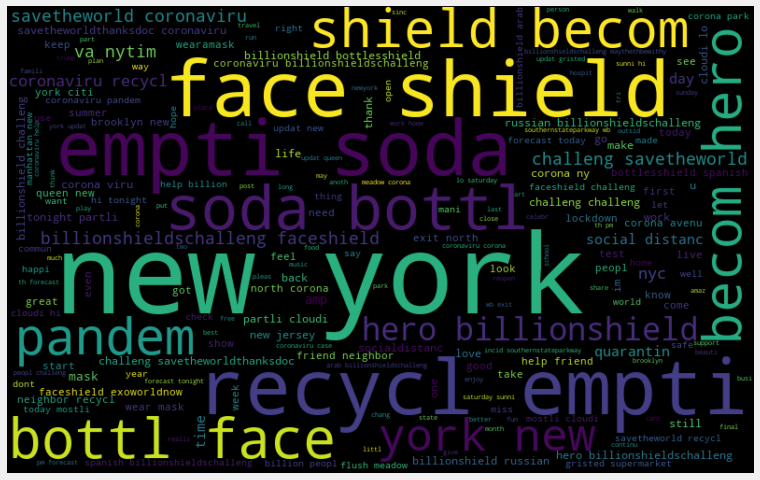

In [35]:
# visualize the most frequency used words using wordcloud

allWords = ' '.join(twts for twts in df_text['tokenized_tw'])

wordCloud = WordCloud(width=800, height=500, random_state=21,max_font_size=119).generate(allWords)

# size the plt object
plt.figure(figsize=(19,8))
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Consider Location and Time in analysis

In [36]:

df_text.groupby(['place']).count


<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x00000201A2FDB8B0>>

In [37]:
from datetime import datetime
from dateutil.parser import parse


In [38]:
#create a new column for data only
df_text['date'] = df_text['created_at']

# Add a new column for date and convert created_at field
for x in range(nRecords):
    # return date as Series
    df_text['date'][x] = datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y')
    # return date as a string
    # df_text['date'][x] = datetime.strftime(datetime.strptime(df_text['created_at'][x],'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
  
#Extract month from the data variable, Add a new column
df_text['month']  = pd.DatetimeIndex(df_text['date']).month


In [39]:
df_text. head(3)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,supposmall business during the corona virus ou...,fri mar 20 03:49:29 +0000 2020,"brooklyn, ny",<na>,0.6000000000000001,0.4,positive,supposmal busi corona viru outbreak repost ...,2020-03-20 03:49:29,3
1,reporting from bay ridge scenes from a city in...,fri mar 20 20:05:05 +0000 2020,"brooklyn, ny",nycshutdown brooklyn nyc newyork corona covid_...,0.0,0.0,neutral,report bay ridg scene citi lockdown nycshu...,2020-03-20 20:05:05,3
2,we are a positive thinking nation what can eac...,fri mar 20 19:56:20 +0000 2020,"new canaan, ct",helpeachother usa corona,0.6984848484848486,0.34242424242424246,positive,posit think nation us today take col...,2020-03-20 19:56:20,3


## Data preparation for further visualizations

In [40]:

# Group by place
# placesRecords = df_text.groupby(['place'])

# get the first item in each place group
# placesRecords.first()


# remove ontario from place column
lista = df_text.place.str.split(",",expand=True)
df_text['place'] = lista [0]


# convert the polarity and subjectivity values to numbers
df_text["polarity"] = pd.to_numeric(df_text['polarity'])
df_text["subjectivity"] = pd.to_numeric(df_text['subjectivity'])


# create new dataframes for further visualizations
# get number of tweets from each place
df_region_sentiment = df_text.groupby('place', as_index=False)['polarity'].mean()

# get the polarities and months information
df_time_sentiment = df_text.groupby('month', as_index=False)['polarity'].mean()





In [41]:
df_region_sentiment.head(5)
# df_region_sentiment.sort_values(by='polarity')

,place,polarity
0,<na>,-0.026910
1,alpine,0.243182
2,amagansett,0.240909
3,amityville,0.187679
4,ansonia,0.259091


<AxesSubplot:title={'center':'NewYork - Sentiment Polarity based on Regions'}, ylabel='place'>

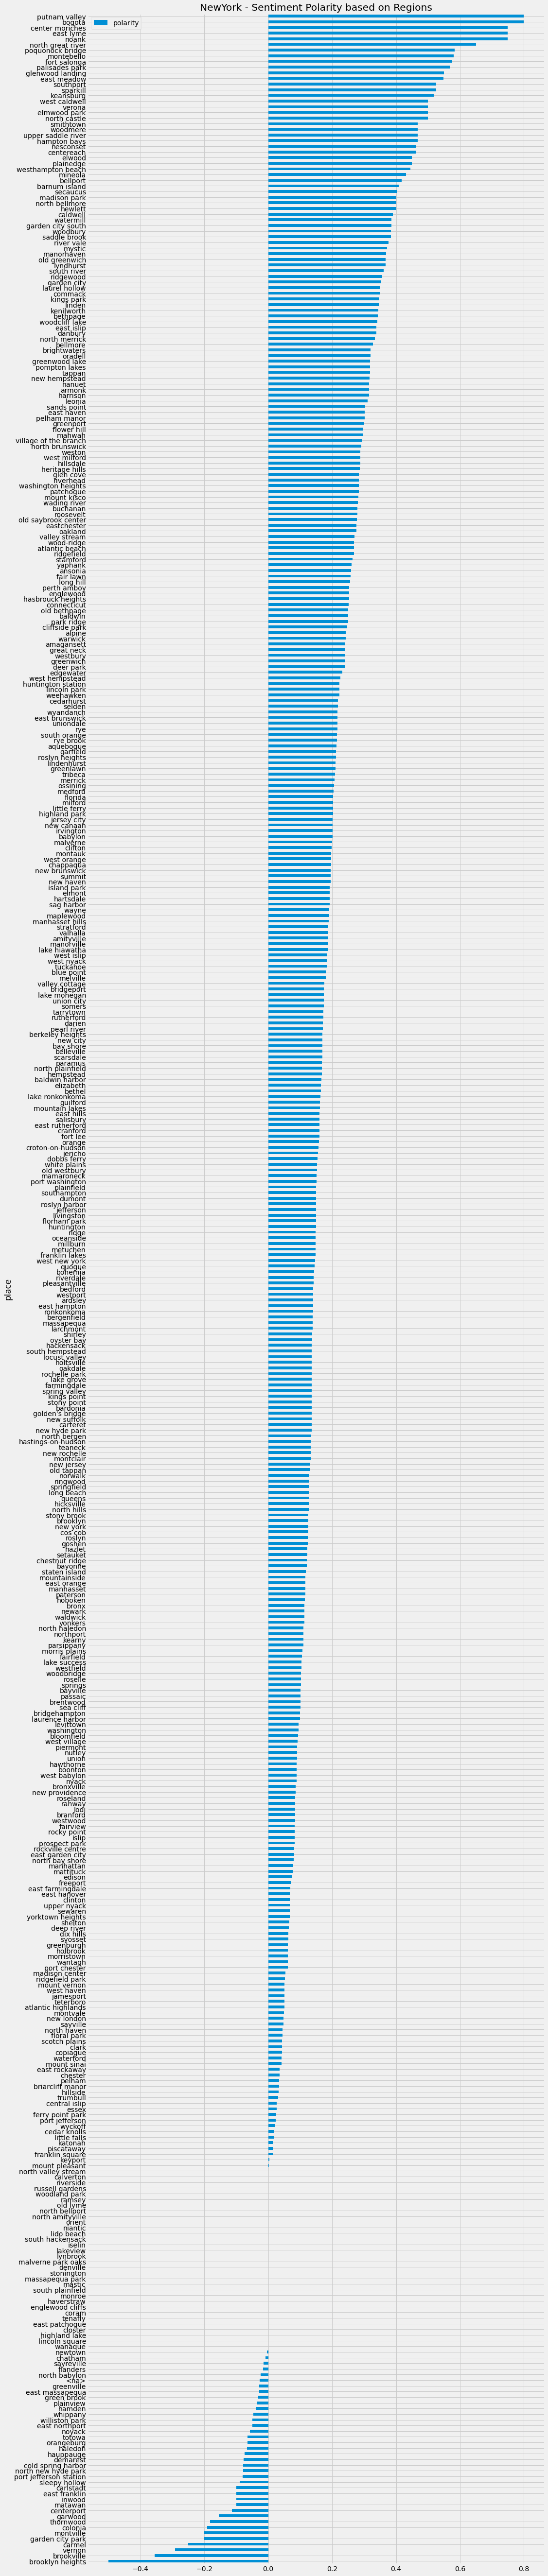

In [55]:
# Chart sentiments based on regions

df_region_sentiment["polarity"] = pd.to_numeric(df_region_sentiment['polarity'])
df_region_sentiment.sort_values(by='polarity').plot.barh(x='place', y='polarity', rot=0, figsize=(15, 90),title='NewYork - Sentiment Polarity based on Regions')





In [43]:
df_time_sentiment.head(5)

,month,polarity
0,3,0.121644
1,4,0.097341
2,5,0.060256
3,6,0.114911
4,7,0.116233


<AxesSubplot:title={'center':'NewYork - Monthly Sentiment Progression'}, xlabel='month'>

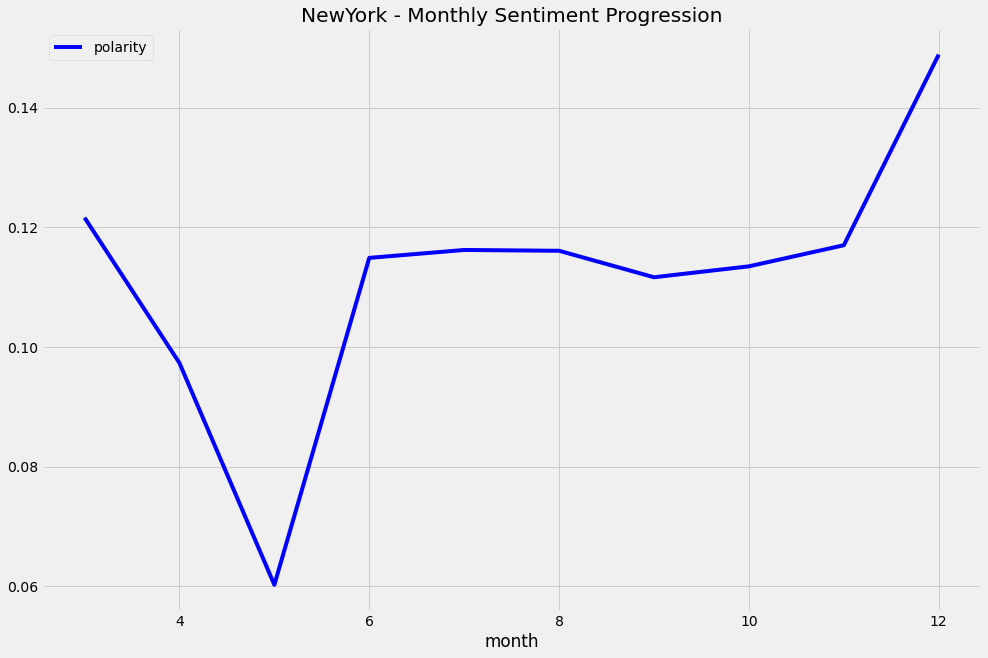

In [44]:
# Chart sentiments based on regions

df_time_sentiment.sort_values(by='month').plot.line(x='month', y='polarity', rot=0, figsize=(15, 10), color="blue",title='NewYork - Monthly Sentiment Progression')


## Extract Hashtags

In [45]:
df_text.head(10)

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month
0,supposmall business during the corona virus ou...,fri mar 20 03:49:29 +0000 2020,brooklyn,<na>,0.600000,0.400000,positive,supposmal busi corona viru outbreak repost ...,2020-03-20 03:49:29,3
1,reporting from bay ridge scenes from a city in...,fri mar 20 20:05:05 +0000 2020,brooklyn,nycshutdown brooklyn nyc newyork corona covid_...,0.000000,0.000000,neutral,report bay ridg scene citi lockdown nycshu...,2020-03-20 20:05:05,3
2,we are a positive thinking nation what can eac...,fri mar 20 19:56:20 +0000 2020,new canaan,helpeachother usa corona,0.698485,0.342424,positive,posit think nation us today take col...,2020-03-20 19:56:20,3
3,duxduce corona beer vs virus queens new york,sat mar 21 05:01:38 +0000 2020,queens,covid duxduce corona beer virus,0.454545,0.136364,positive,duxduc corona beer vs viru queen new york,2020-03-21 05:01:38,3
4,i hate this koon yrdgangshoota nigga arguing ...,thu mar 19 20:28:50 +0000 2020,bronx,<na>,0.594444,-0.477778,negative,hate koon yrdgangshoota nigga argu aint...,2020-03-19 20:28:50,3
5,corona ny fri mar th pm forecast tonight partl...,fri mar 20 21:06:59 +0000 2020,queens,<na>,0.000000,0.000000,neutral,corona ny fri mar th pm forecast tonight partl...,2020-03-20 21:06:59,3
6,broke the quarantine for some bball with the t...,fri mar 20 18:54:44 +0000 2020,brooklyn,mobadanga corona,0.000000,0.000000,neutral,broke quarantin bball team mobadanga coro...,2020-03-20 18:54:44,3
7,mr softee out here tripping tripping did he no...,fri mar 20 20:15:20 +0000 2020,queens,<na>,0.266667,0.225000,positive,mr softe trip trip get memo know firs...,2020-03-20 20:15:20,3
8,my evening run feels a little more apocalyptic...,fri mar 20 00:39:20 +0000 2020,manhattan,corona corona,0.477273,0.146307,positive,even run feel littl apocalypt everi day cor...,2020-03-20 00:39:20,3
9,remember guys always wear protection trojan co...,thu mar 19 20:58:01 +0000 2020,manhattan,trojan condom nyc corona coronatime lol funnyo...,0.536364,0.357576,positive,rememb guy alway wear protect trojan condom ny...,2020-03-19 20:58:01,3


In [46]:
## Extract Hashtags
positiveHashtags = []
negativeHashtags = []


for i in range(nRecords):
    if (df_text['analysis'][i]=='positive'):
        #positive sentiment  
        if ('<na>' in df_text['hashtags'][i]):      
            continue  
        else:
            splitList = str(df_text['hashtags'][i]).split(" ")            
            positiveHashtags = positiveHashtags + splitList
    elif (df_text['analysis'][i]=='negative'):
        #negative sentiment
        if ('<na>' in df_text['hashtags'][i]):  
            continue
        else:    
            splitList = str(df_text['hashtags'][i]).split(" ")    
            negativeHashtags = negativeHashtags + splitList       
    else:
        # neutral sentiment
        continue


# positive_hashtags = df_allHashtags['hashtags']




In [47]:
# type(negativeHashtags)
# print (negativeHashtags)

#Clear up the list from unwanted hashtags
commercialHashtags = ["streetphotographer", "urbanstreetphotography","urbanstreetphotogallery","photodocumentary"
,"spicollective","cityscape","urbansteetphotogallery","ig_street","bnw","bw","lensculture","bollywood","entertainment","urbanstreetphotogallery"]


for element in negativeHashtags:
    if element in commercialHashtags:
        negativeHashtags.remove(element)

for element in positiveHashtags:
    if element in commercialHashtags:
        positiveHashtags.remove(element)        

In [48]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(negativeHashtags)
df_NegativeHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_NegativeHashtags = df_NegativeHashtags.nlargest(columns='count', n=30)                    
df_NegativeHashtags.head(20) 

,Hashtag,count
385,savetheworld,1589
389,billionshieldschallenge,1579
7,coronavirus,1511
387,billionshields,1375
772,faceshield,1171
17,covid19,558
388,bottles2shields,520
262,covid,359
1497,masks4all,291
928,exoworldnow,240


<AxesSubplot:title={'center':'NewYork - Negative Tweets - Hashtags'}, ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

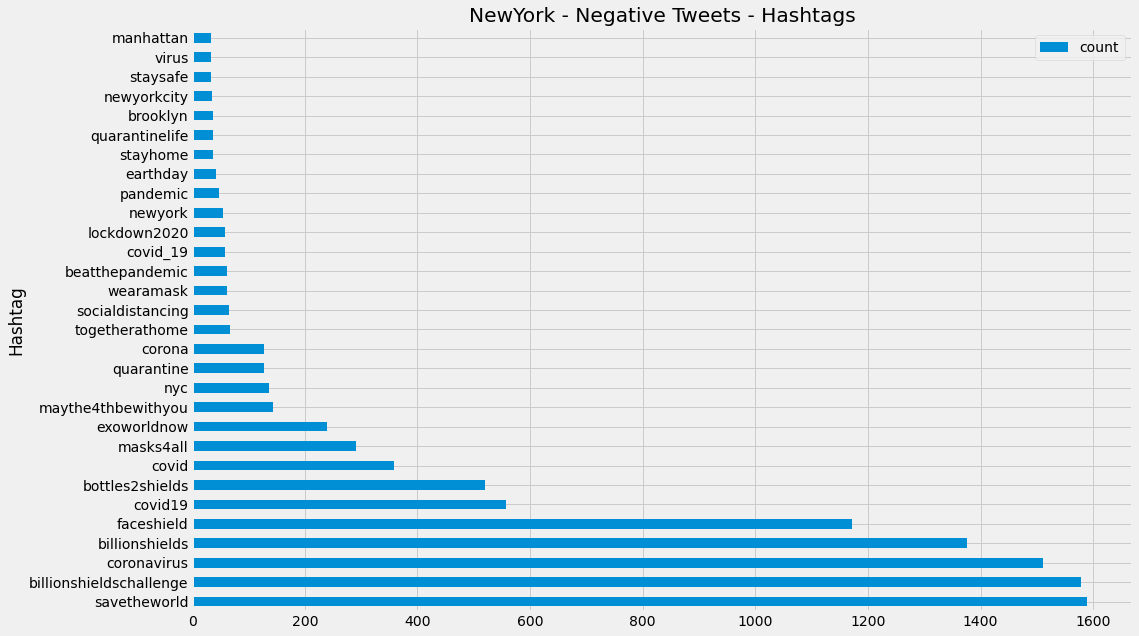

In [49]:
# display topc 20 negative tweets

plt.figure(figsize=(15,10))
df_NegativeHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10), title='NewYork - Negative Tweets - Hashtags')


In [50]:
# populate the hashtags based on frequency and display the top 15
freq = nltk.FreqDist(positiveHashtags)
df_PositiveHashtags = pd.DataFrame( { 'Hashtag': list(freq.keys()),
                    'count':list(freq.values())})
df_PositiveHashtags = df_PositiveHashtags.nlargest(columns='count', n=30)       


df_PositiveHashtags.head(20) 

                 

,Hashtag,count
221,covid19,1465
63,coronavirus,919
9,nyc,734
2,corona,599
48,quarantine,498
3,covid,424
894,wearamask,412
29,socialdistancing,411
24,covid_19,350
291,pandemic,295


<AxesSubplot:title={'center':'NewYork - Positive Tweets - Hashtags'}, ylabel='Hashtag'>

<Figure size 1080x720 with 0 Axes>

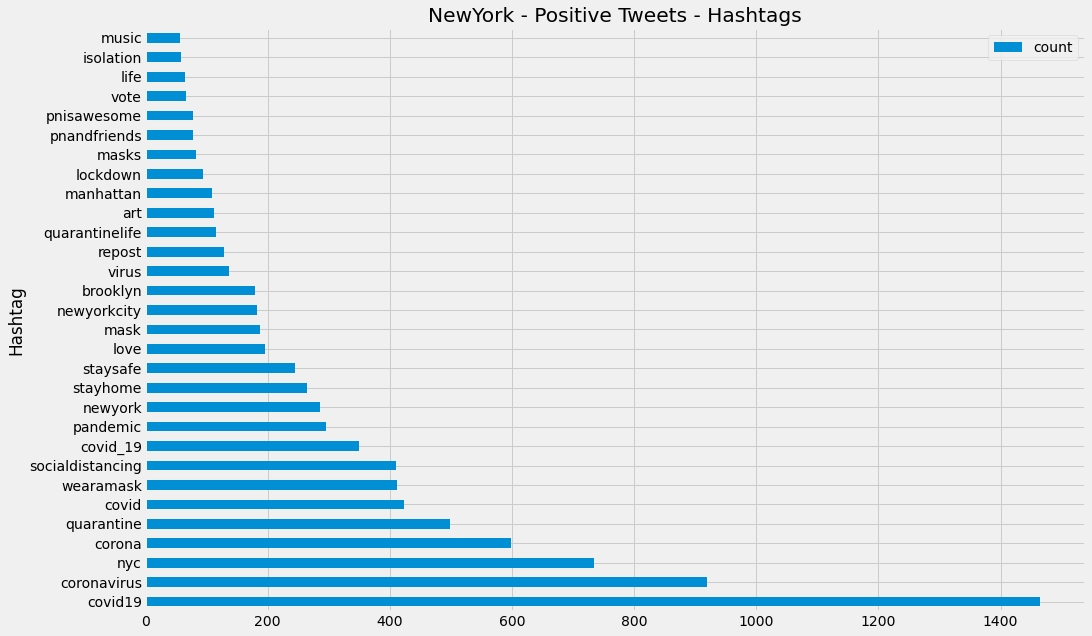

In [51]:
# display topc 20 positive tweets
plt.figure(figsize=(15,10))
df_PositiveHashtags.plot.barh(x='Hashtag', y='count', rot=0, figsize=(15, 10),title='NewYork - Positive Tweets - Hashtags')

In [52]:
# df_text['strTweets'] = df_text['text'].to_string()
# df_text.head()

In [53]:
# type(df_text['strTweets'])
# type(df_text['text'])

#Create a function to compute the negative, nuetral, and positive sentiment

def getSentAnalysis(score):
    if "negative":
        return 0 
    elif 'positive':
        return 1
    else:
        return 0

# Add column analysis and add a label such as positive-negative-neutral to each tweet
df_text['label'] = df_text['analysis'].apply(getSentAnalysis)


In [54]:
df_text.head()

,text,created_at,place,hashtags,subjectivity,polarity,analysis,tokenized_tw,date,month,label
0,supposmall business during the corona virus ou...,fri mar 20 03:49:29 +0000 2020,brooklyn,<na>,0.600000,0.400000,positive,supposmal busi corona viru outbreak repost ...,2020-03-20 03:49:29,3,0
1,reporting from bay ridge scenes from a city in...,fri mar 20 20:05:05 +0000 2020,brooklyn,nycshutdown brooklyn nyc newyork corona covid_...,0.000000,0.000000,neutral,report bay ridg scene citi lockdown nycshu...,2020-03-20 20:05:05,3,0
2,we are a positive thinking nation what can eac...,fri mar 20 19:56:20 +0000 2020,new canaan,helpeachother usa corona,0.698485,0.342424,positive,posit think nation us today take col...,2020-03-20 19:56:20,3,0
3,duxduce corona beer vs virus queens new york,sat mar 21 05:01:38 +0000 2020,queens,covid duxduce corona beer virus,0.454545,0.136364,positive,duxduc corona beer vs viru queen new york,2020-03-21 05:01:38,3,0
4,i hate this koon yrdgangshoota nigga arguing ...,thu mar 19 20:28:50 +0000 2020,bronx,<na>,0.594444,-0.477778,negative,hate koon yrdgangshoota nigga argu aint...,2020-03-19 20:28:50,3,0
